Michael Hotaling \
3/23/2021

# 1.2 Exercises: Charts - R

In [9]:
library(ggplot2)
library(readxl)
library(dplyr)
library(stringr)
library(data.table)
library(scales)
options(repr.plot.width = 14, repr.plot.height = 8)

In [2]:
hotdog_winners <- read_excel("hotdog-contest-winners.xlsm")
names(hotdog_winners) <- sub(" ", "_", names(hotdog_winners))

hotdog_places <-read_excel("hotdog-places.xlsm")
names(hotdog_places) <- sub(" ", "_", names(hotdog_places))

obama_approval_ratings <- read_excel("obama-approval-ratings.xls")
names(obama_approval_ratings) <- sub(" ", "_", names(obama_approval_ratings))

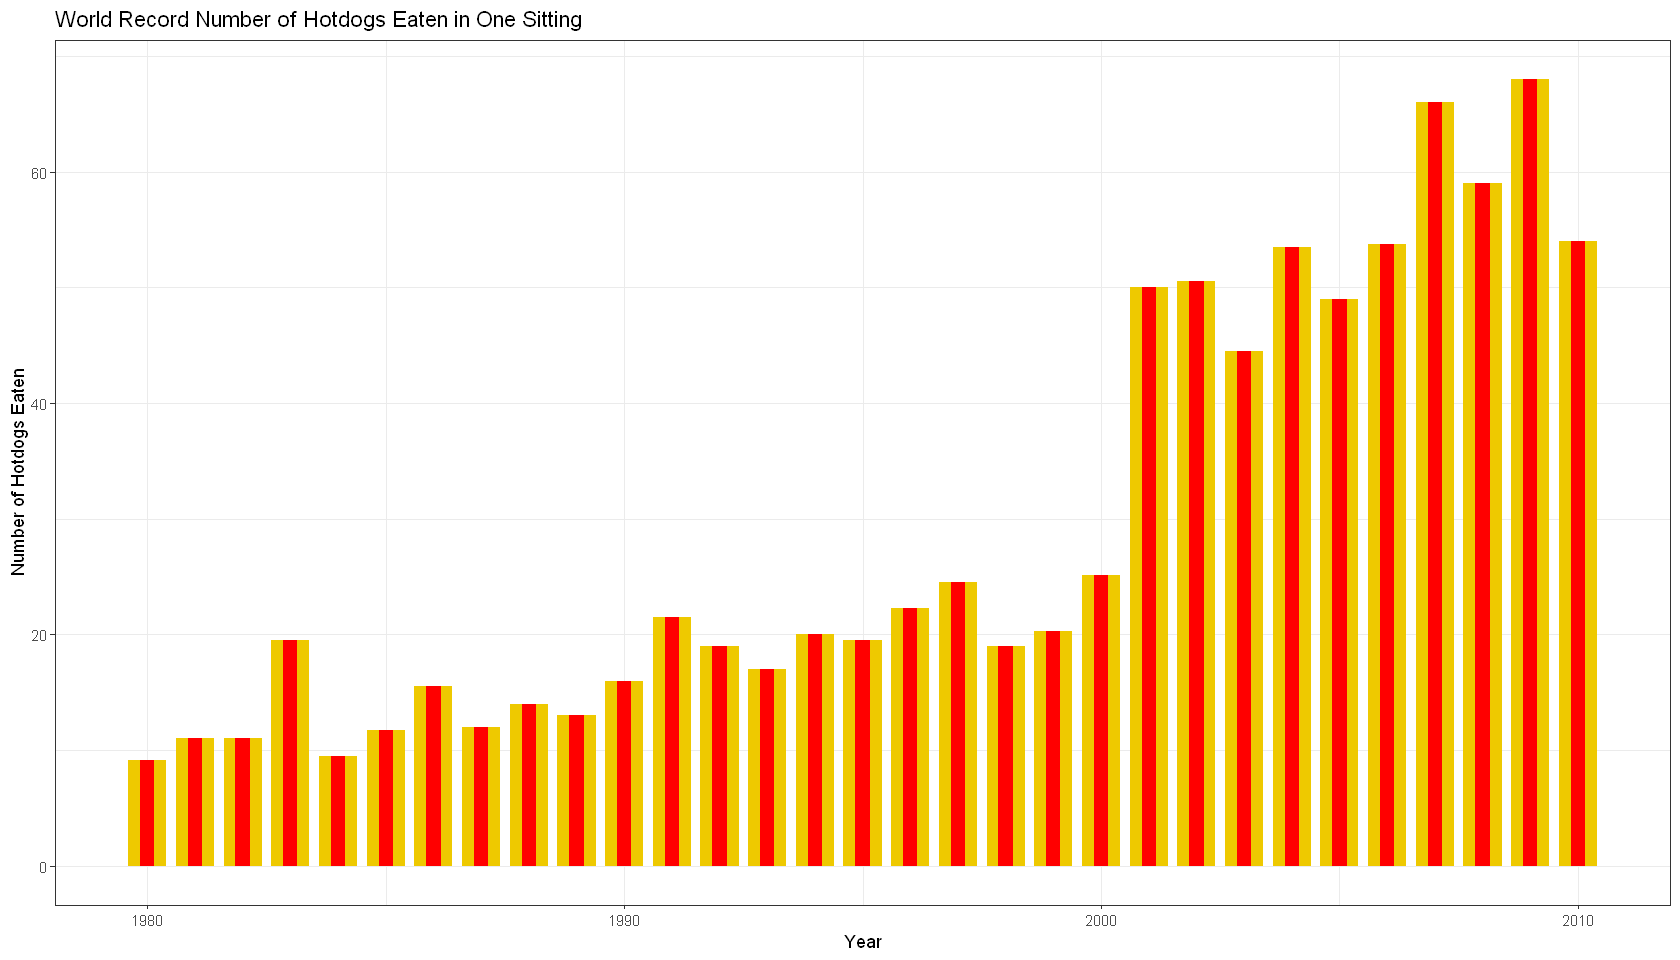

In [3]:
p <- ggplot() + 
geom_bar(data = hotdog_winners, aes(x = Year, y = Dogs_eaten), stat = "identity", fill = "gold2", width = 0.8) +
geom_bar(data = hotdog_winners, aes(x = Year, y = Dogs_eaten), stat = "identity", fill = "red", width = 0.3) +
xlab("Year") +
ylab("Number of Hotdogs Eaten") +
ggtitle("World Record Number of Hotdogs Eaten in One Sitting") +
theme_bw()

# I tried to add mustard to my plot just like my Python plot, but for some reason, it doesn't want to show up
# I'm really not sure what I'm doing wrong
# I've left that code in since it doesn't seem to impact the graph at all. 

# Iterate over each entry to add mustard to the plot
for(i in 1:nrow(hotdog_winners)) { 
    
    # Pulling the numbers from each observation
    hotdogs <- hotdog_winners$Dogs_eaten[i]  
    year <- hotdog_winners$Year[i]
    
    # Create a linear vector to add the sine wave to
    Year <- (rep(0,1001) + 1) * year
    
    # Adding the sine wave
    Year <- Year + sin(seq(0,hotdogs, hotdogs/1000) * 2)
    
    # Creating a vector from 0 to number of hotdogs for that year
    Dogs_eaten <- seq(0,hotdogs, hotdogs/1000)
    
    # Creating a dataframe to add the data to ggplot
    df <- data.frame(Year,Dogs_eaten)
    
    # Adding the data to the plot
    p + geom_line(data = df, aes(x = Year,  y = Dogs_eaten), color = "yellow", size = 3)
}

print(p)

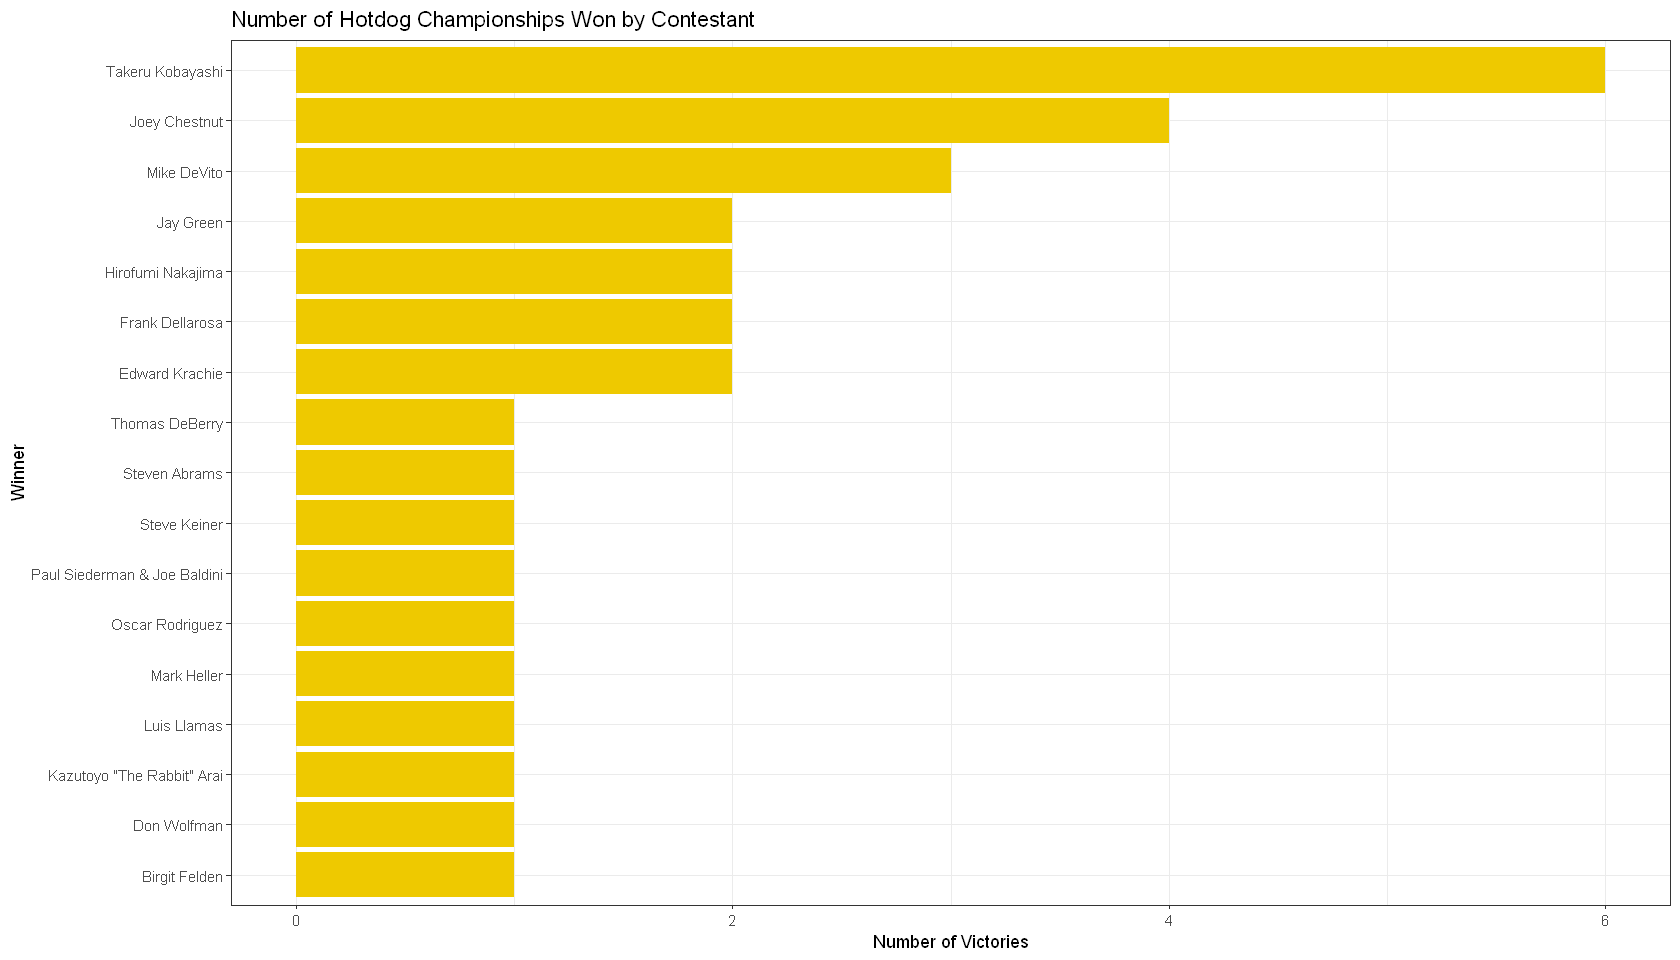

In [4]:
hotdog_winners$Winner <- sub('Takeru "Tsunami" Kobayashi', 'Takeru Kobayashi', hotdog_winners$Winner)

df <- hotdog_winners %>% group_by(Winner) %>%   mutate(count_name_occurr = n())
ggplot(data=df, aes(x=reorder(df$Winner,count_name_occurr))) +
geom_bar(stat="count", fill = "gold2") + 
xlab("Winner") + 
ylab("Number of Victories") + 
coord_flip() + 
ggtitle("Number of Hotdog Championships Won by Contestant") + 
theme_bw()

In [5]:
df1 = transpose(hotdog_places)
names(df1) = c("First Place", "Second Place","Third Place")
df1$Year <- names(hotdog_places)
df2 = melt(df1, id.vars = 'Year')
names(df2) <- c("Year","Place","Hotdogs")

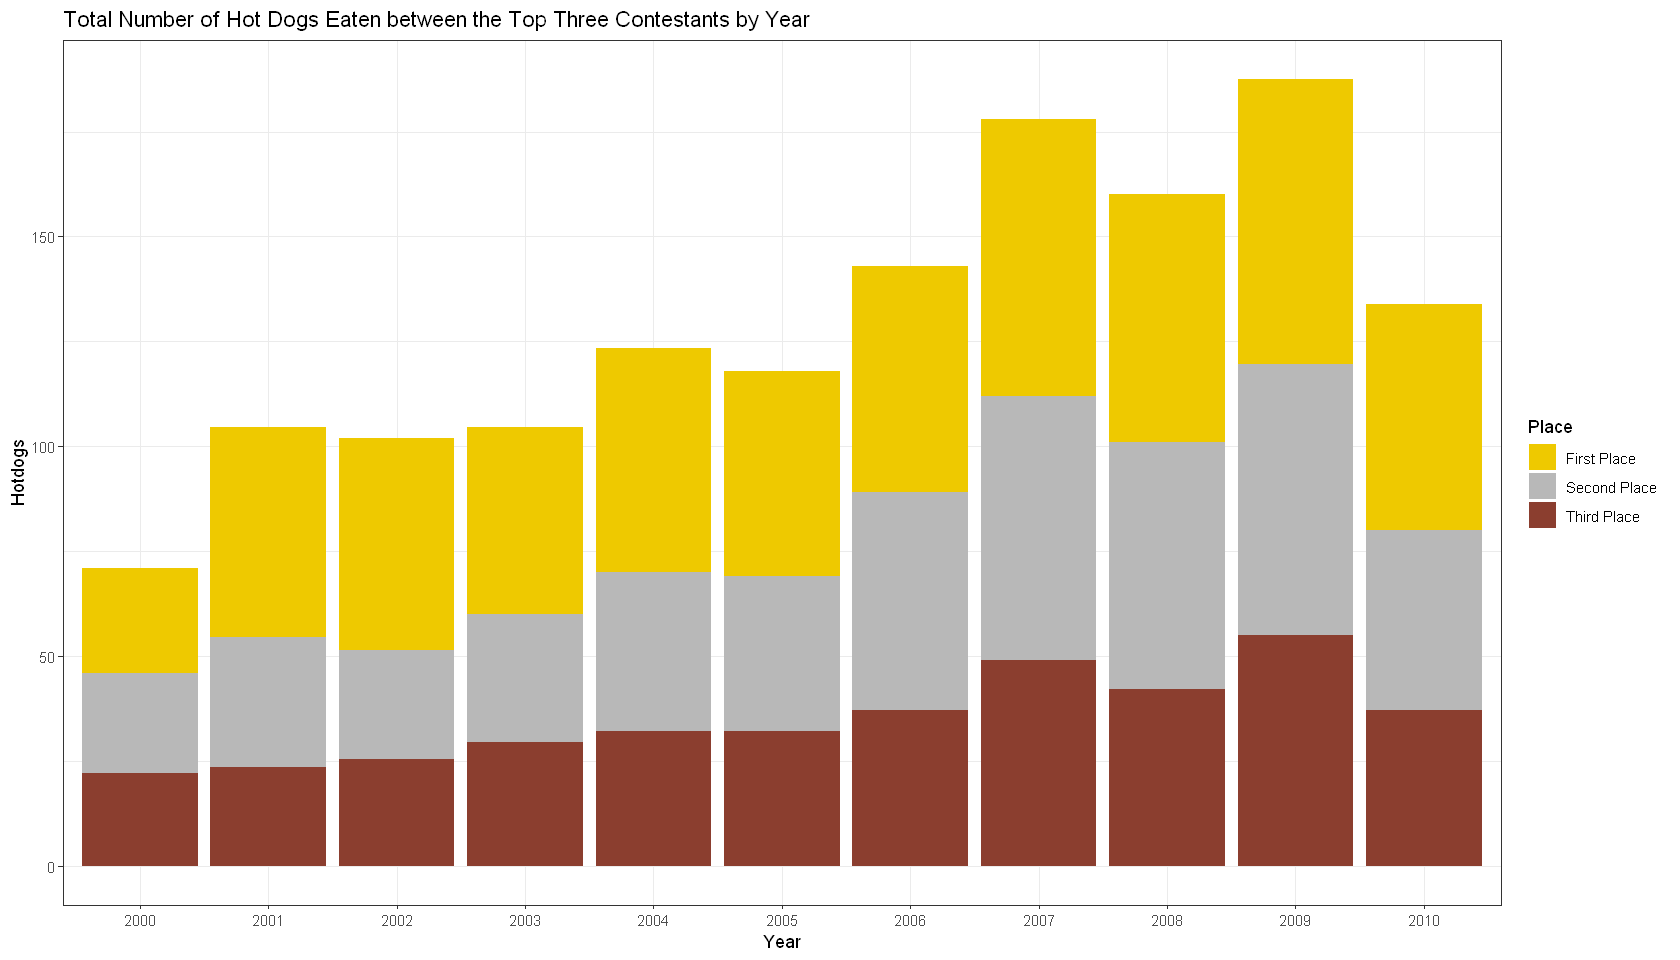

In [6]:
ggplot(data = df2, aes(fill= Place, x = Year, y = Hotdogs)) + 
geom_bar(position="stack", stat="identity") +
scale_fill_manual(values = c("gold2","gray72","coral4")) + 
theme_bw() + 
ggtitle("Total Number of Hot Dogs Eaten between the Top Three Contestants by Year")

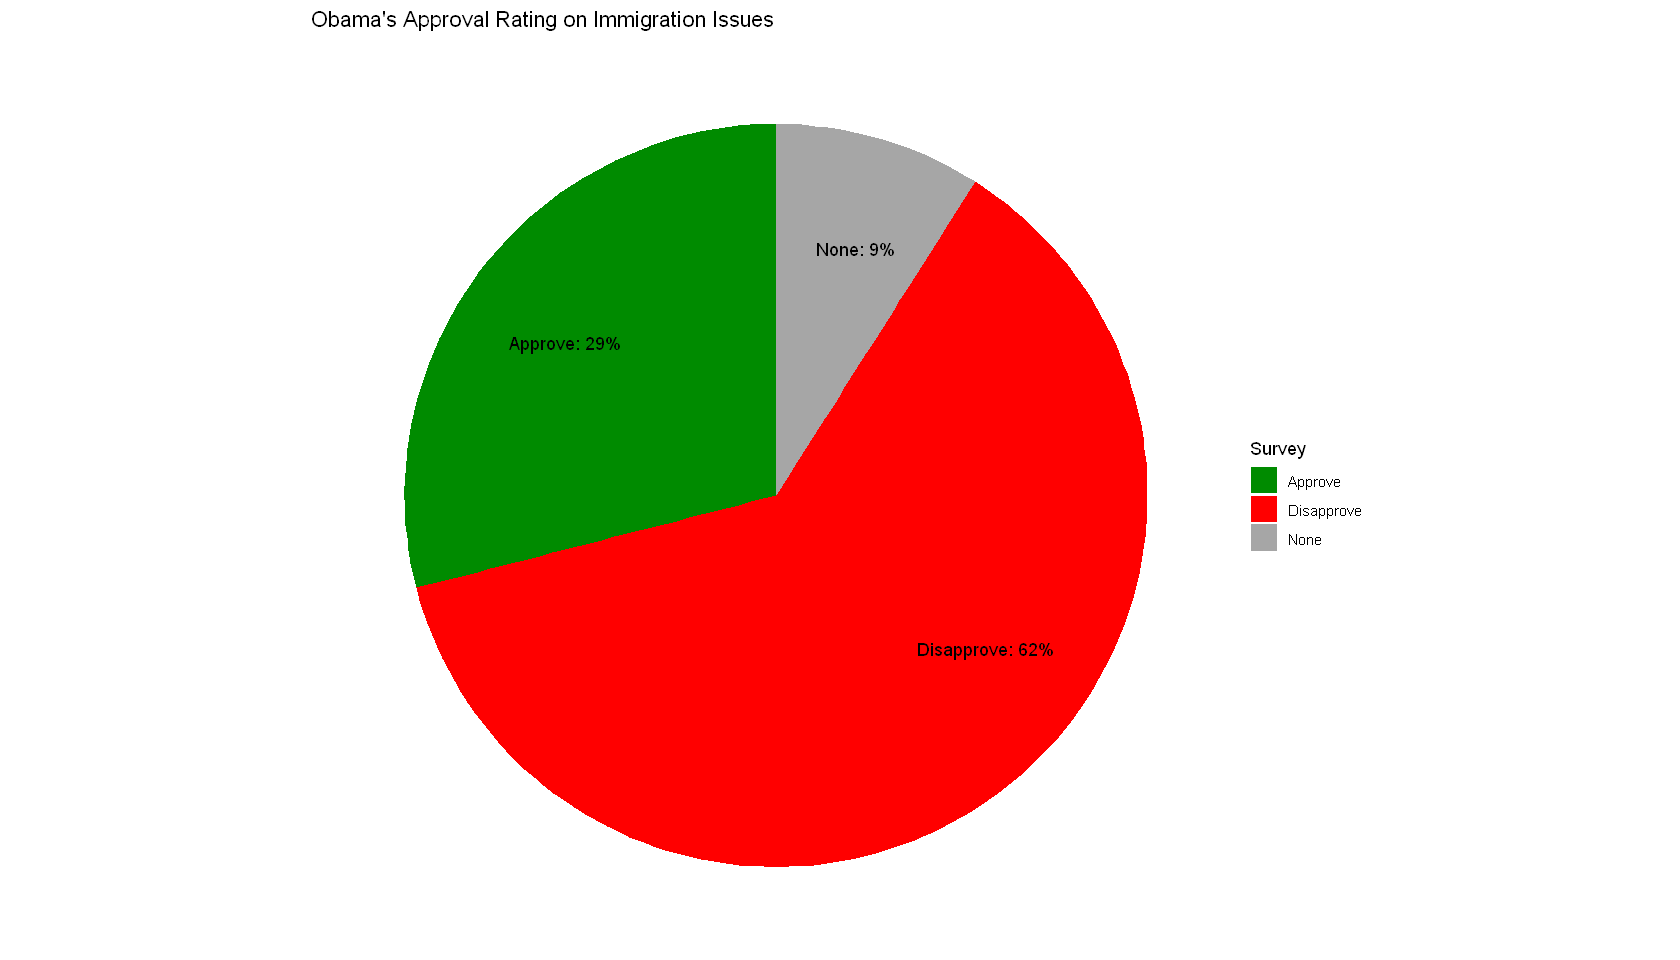

In [7]:
df3 = melt(obama_approval_ratings, id.vars = "Issue", value.name = "Rating", variable.name = "Survey")
df3 = subset(df3, Issue == "Immigration" )

ggplot(df3, aes(x="", y=Rating, fill=Survey)) +
geom_bar(stat="identity", width=1) + 
coord_polar("y", start = 0) + 
scale_fill_manual(values = c("green4","red","gray65")) + 
theme_bw() +
geom_text(aes(x = 1.2, y = c(85,35,5), 
              label = paste(Survey,": ", 100 * Rating/sum(Rating),"%", sep = ""))) +
ggtitle("Obama's Approval Rating on Immigration Issues") + 
theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) + 
theme_void()

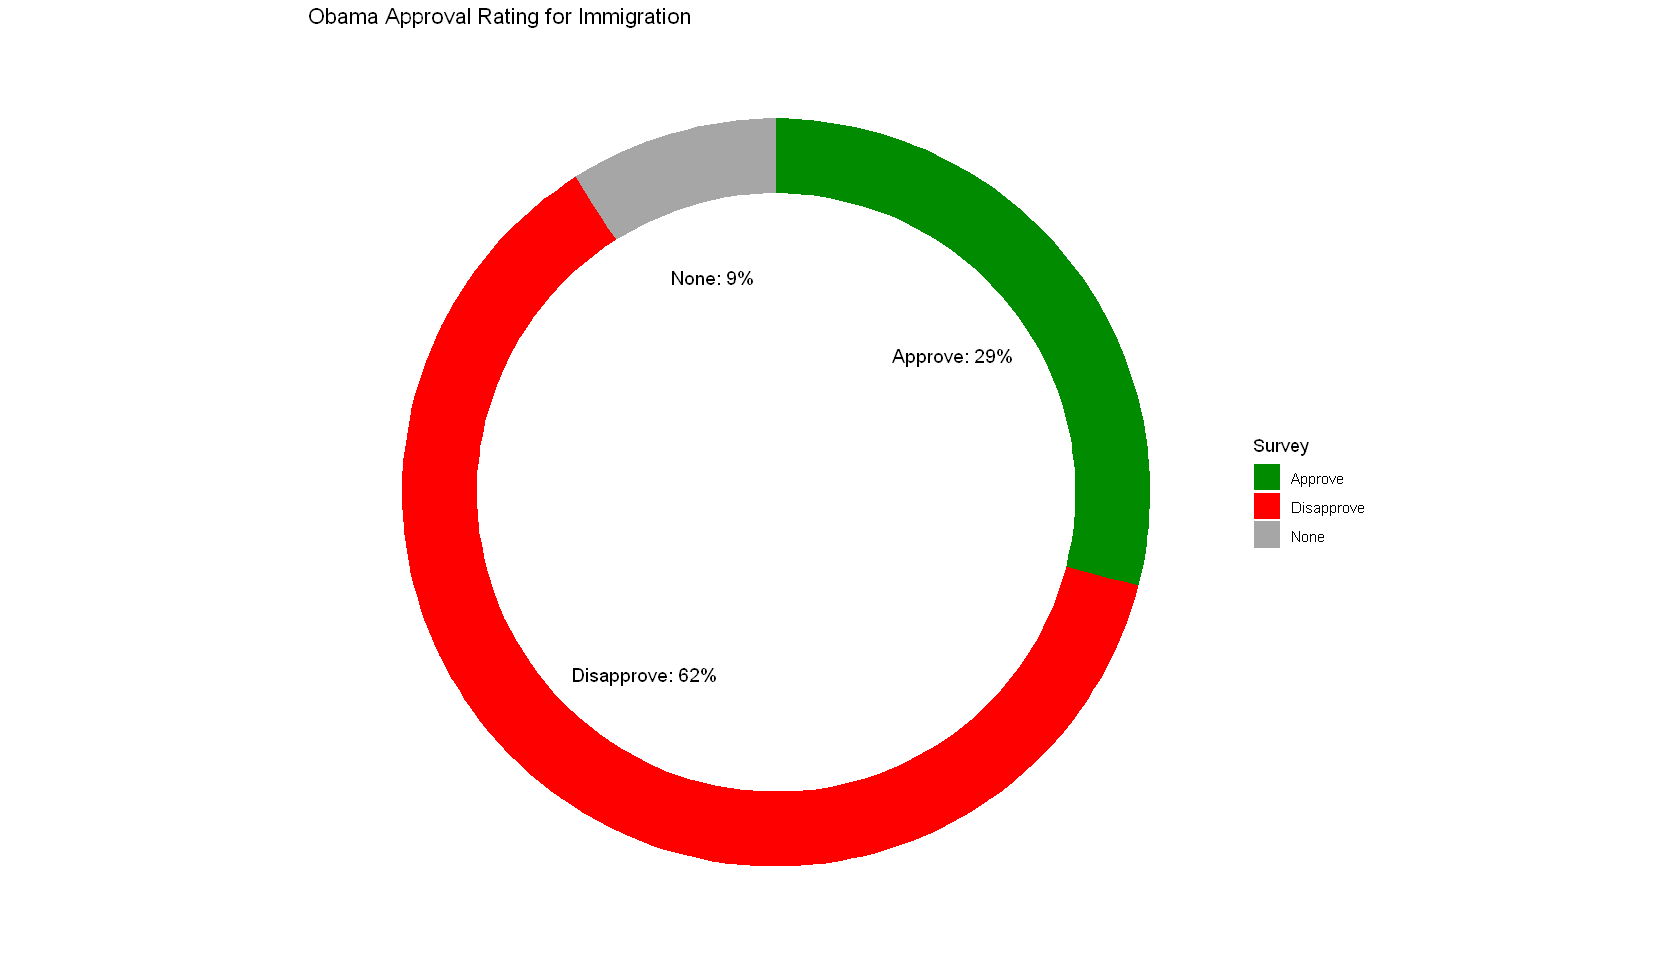

In [8]:
df3$fraction <- df3$Rating / sum(df3$Rating)
df3$ymax = cumsum(df3$fraction)
df3$ymin = c(0, head(df3$ymax, n=-1))
df3$labelPosition <- (df3$ymax + df3$ymin) / 2

df3$label <- paste(df3$Survey, ": ", df3$Rating, "%", sep = "")

ggplot(df3, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=Survey)) +
geom_rect() +
scale_fill_manual(values = c("green4","red","gray65")) + 
coord_polar(theta="y") +
geom_text( x=2, aes(y=labelPosition, label=label), size=4) + # x here controls label position (inner / outer)
xlim(c(-1, 4)) +
theme_bw() +
theme(legend.position = "none") + 
theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) + 
ggtitle("Obama's Approval Rating on Immigration Issues") + 
theme_void() + 
ggtitle("Obama Approval Rating for Immigration")